# SPOT Kriging in 6 Dimensions: Nyström Approximation vs. Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
# do not change, these are given by the organizers
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

## Aquisition Random and Regression and y as Infill Criterion

In [3]:
init_size = 12
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 0.0
seed = 321
max_surrogate_points = 24
min_Lambda = -4
max_Lambda = 3
min_theta = -1
max_theta = 1
isotropic = False
acquisition_failure_strategy = "random"

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_22_26_48_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_22-26-48 for SummaryWriter()
spotpython tuning: 45.355898844847545 [#---------] 13.00%. Success rate: 100.00% 
spotpython tuning: 39.27689246985392 [#---------] 14.00%. Success rate: 100.00% 
spotpython tuning: 39.27689246985392 [##--------] 15.00%. Success rate: 66.67% 
spotpython tuning: 39.27689246985392 [##--------] 16.00%. Success rate: 50.00% 
spotpython tuning: 14.210612708343556 [##--------] 17.00%. Success rate: 60.00% 
spotpython tuning: 14.210612708343556 [##--------] 18.00%. Success rate: 50.00% 
spotpython tuning: 14.210612708343556 [##--------] 19.00%. Success rate: 42.86% 
spotpython tuning: 14.210612708343556 [##--------] 20.00%. Success rate: 37.50% 
spotpython tuning: 14.210612708343556 [##--------] 21.00%. Success rate: 33.33% 
spotpython tuning: 14.210612708343556 [##--------] 22.00%. Success rate: 30.00% 
s

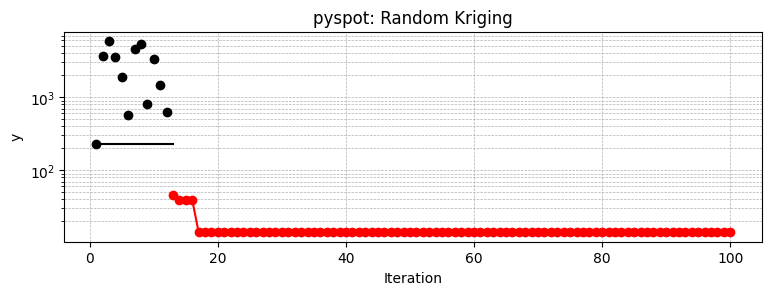

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=60,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    acquisition_failure_strategy=acquisition_failure_strategy,
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)
spot_exact_random = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
spot_exact_random.run()
spot_exact_random.plot_progress(log_y=True, title="pyspot: Random Kriging")

## Aquisition MM and Regression and y as Infill Criterion

In [5]:
acquisition_failure_strategy = "mm"

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_22_27_28_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_22-27-28 for SummaryWriter()
spotpython tuning: 45.355898844847545 [#---------] 13.00%. Success rate: 100.00% 
spotpython tuning: 39.27689246985392 [#---------] 14.00%. Success rate: 100.00% 
spotpython tuning: 39.27689246985392 [##--------] 15.00%. Success rate: 66.67% 
spotpython tuning: 39.27689246985392 [##--------] 16.00%. Success rate: 50.00% 
spotpython tuning: 14.210612708343556 [##--------] 17.00%. Success rate: 60.00% 
spotpython tuning: 14.210612708343556 [##--------] 18.00%. Success rate: 50.00% 
spotpython tuning: 14.210612708343556 [##--------] 19.00%. Success rate: 42.86% 
spotpython tuning: 14.210612708343556 [##--------] 20.00%. Success rate: 37.50% 
spotpython tuning: 14.210612708343556 [##--------] 21.00%. Success rate: 33.33% 
spotpython tuning: 14.210612708343556 [##--------] 22.00%. Success rate: 30.00% 
s

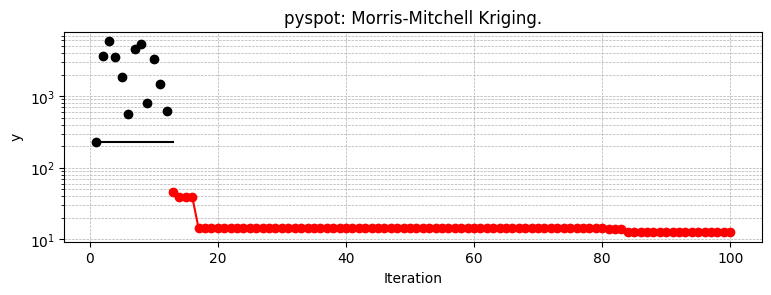

In [6]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=60,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    acquisition_failure_strategy=acquisition_failure_strategy,
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)
spot_exact_mm = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_exact
)
spot_exact_mm.run()
spot_exact_mm.plot_progress(log_y=True, title="pyspot: Morris-Mitchell Kriging.")

## Compare Minimum Found

In [7]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_random.min_y:.4f} at x = {spot_exact_random.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_mm.min_y:.4f} at x = {spot_exact_mm.min_X}")

[6D] Exact Kriging y: min y = 14.2106 at x = [ 0.01021913 -0.10504217  0.17015832 -0.03923371  0.22296659  0.12920017]
[6D] Exact Kriging ei: min y = 12.6160 at x = [ 0.03995919 -0.17668912  0.10269223  0.00265639  0.20387766  0.05709202]


x0:  31.069414247552825
x1:  31.069414247552825
x2:  55.81084713964373
x3:  100.0
x4:  31.069414247552825
x5:  31.069414247552825


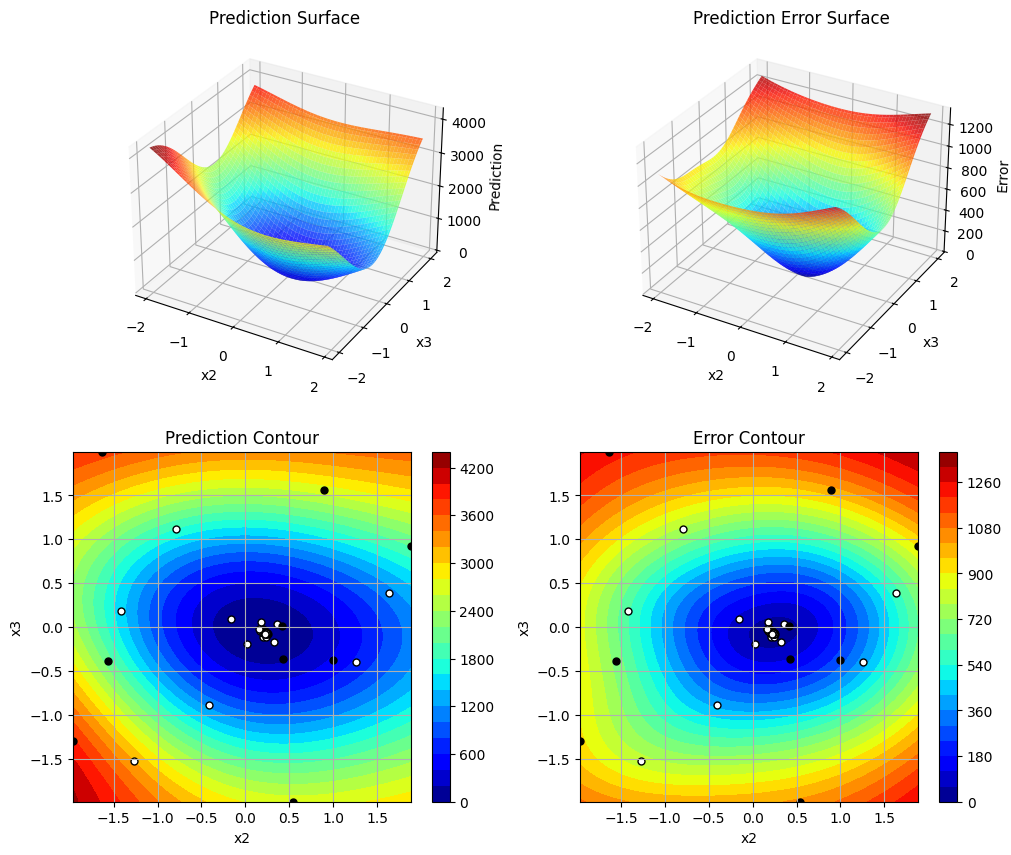

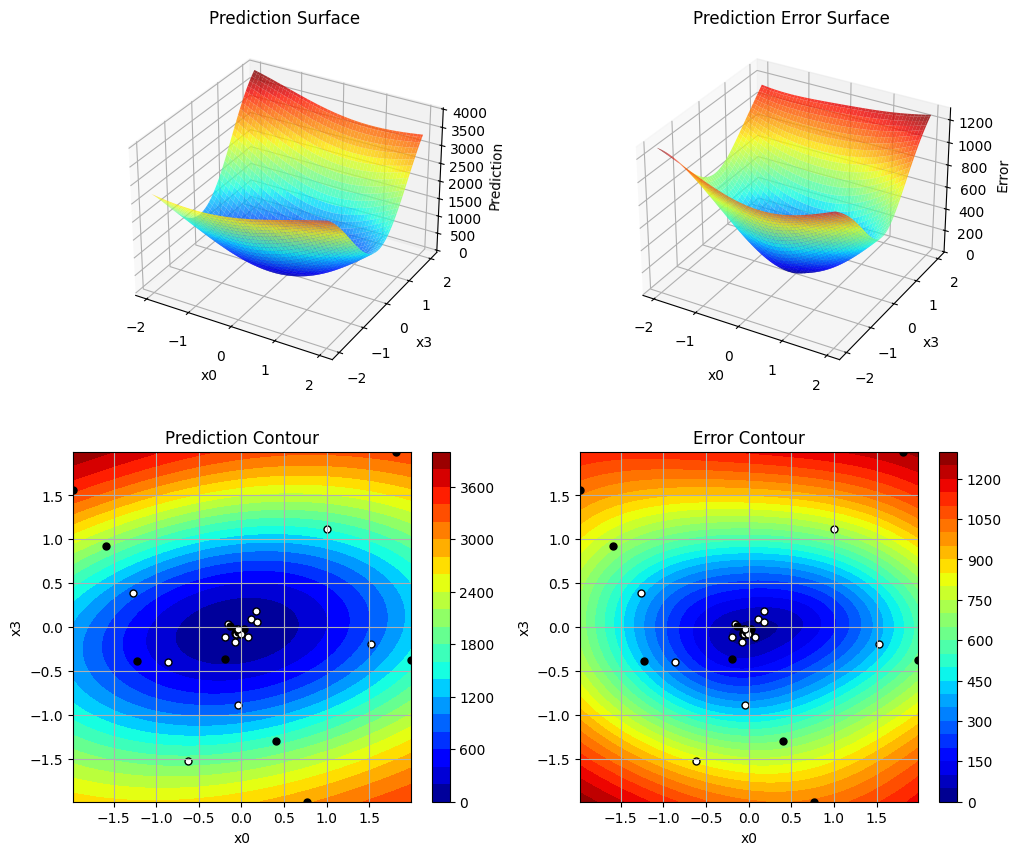

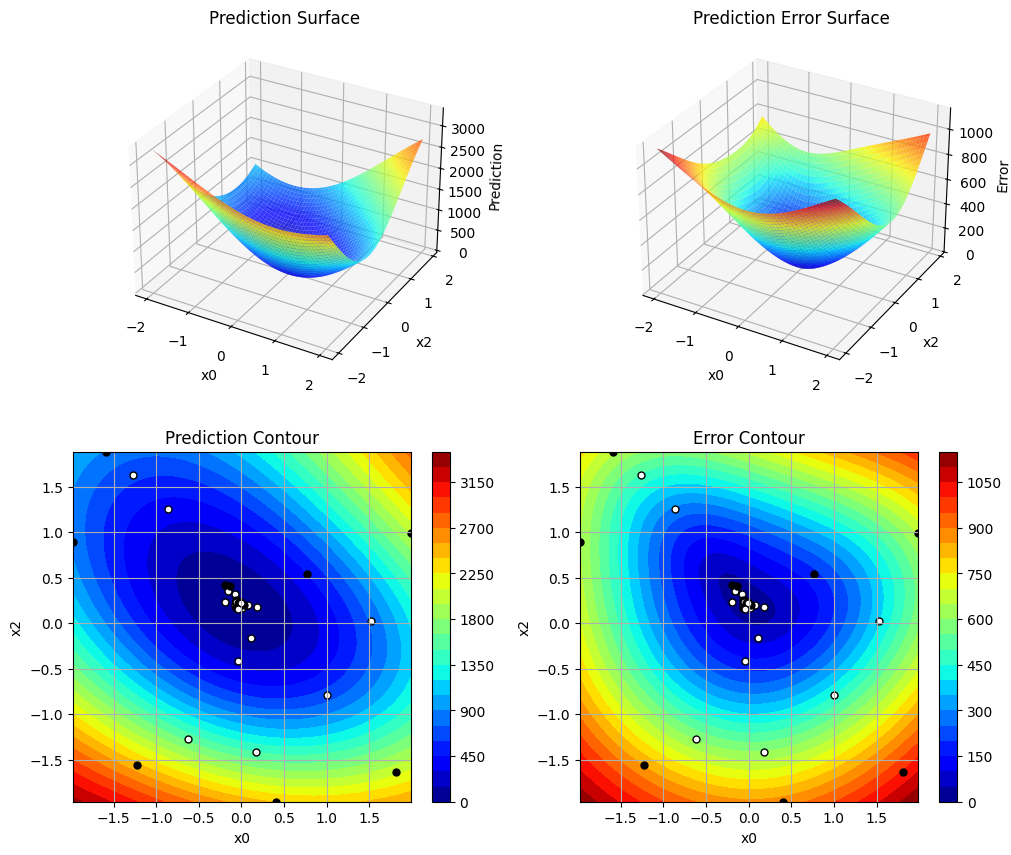

In [8]:
spot_exact_random.plot_important_hyperparameter_contour(max_imp=3)


x0:  16.463916507624248
x1:  16.463916507624248
x2:  16.463916507624248
x3:  16.463916507624248
x4:  100.0
x5:  16.463916507624248


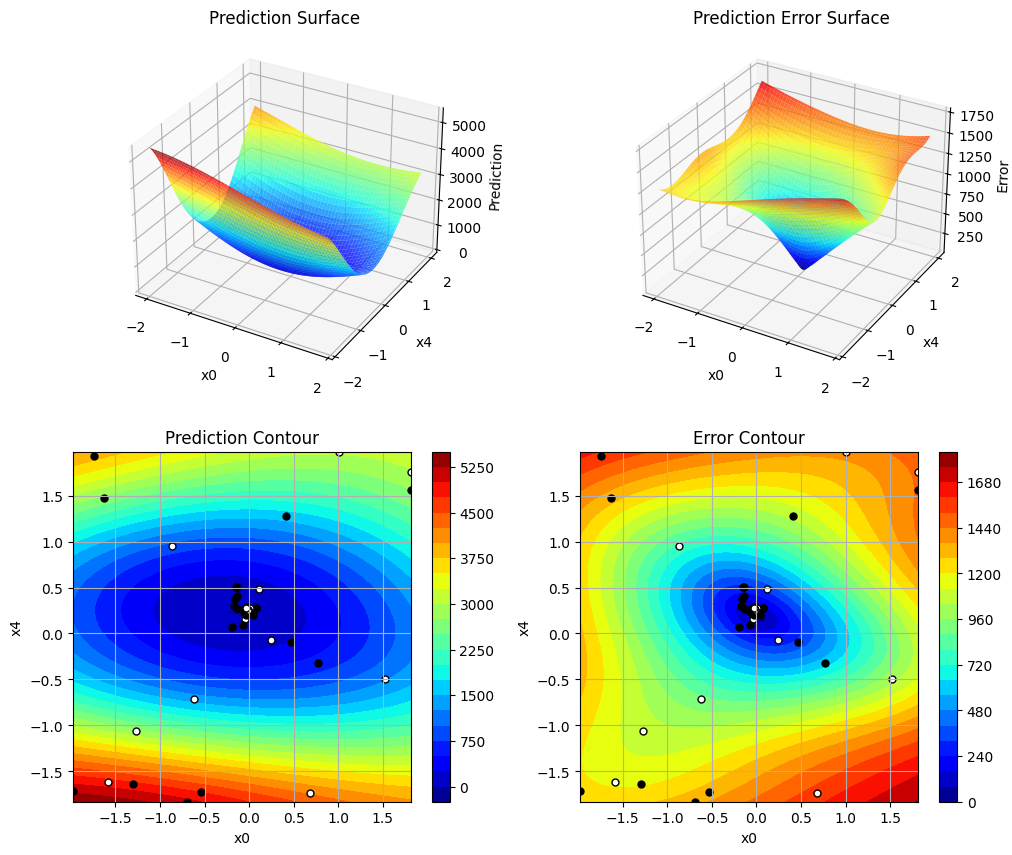

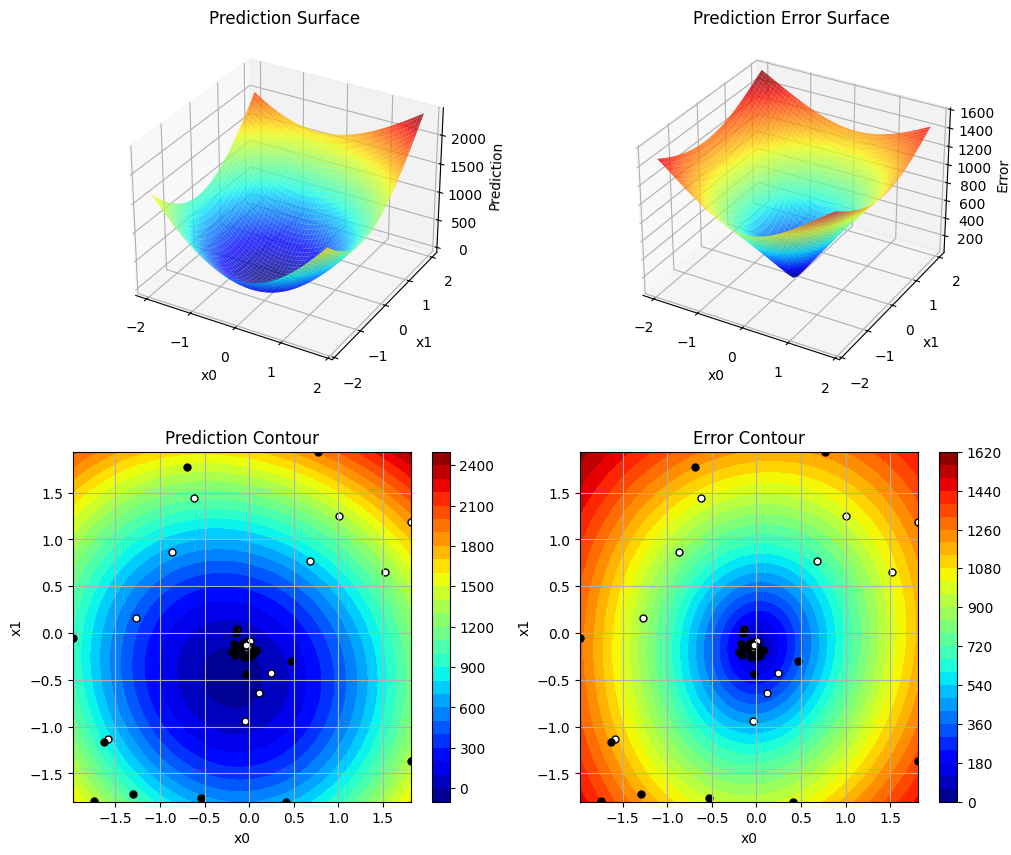

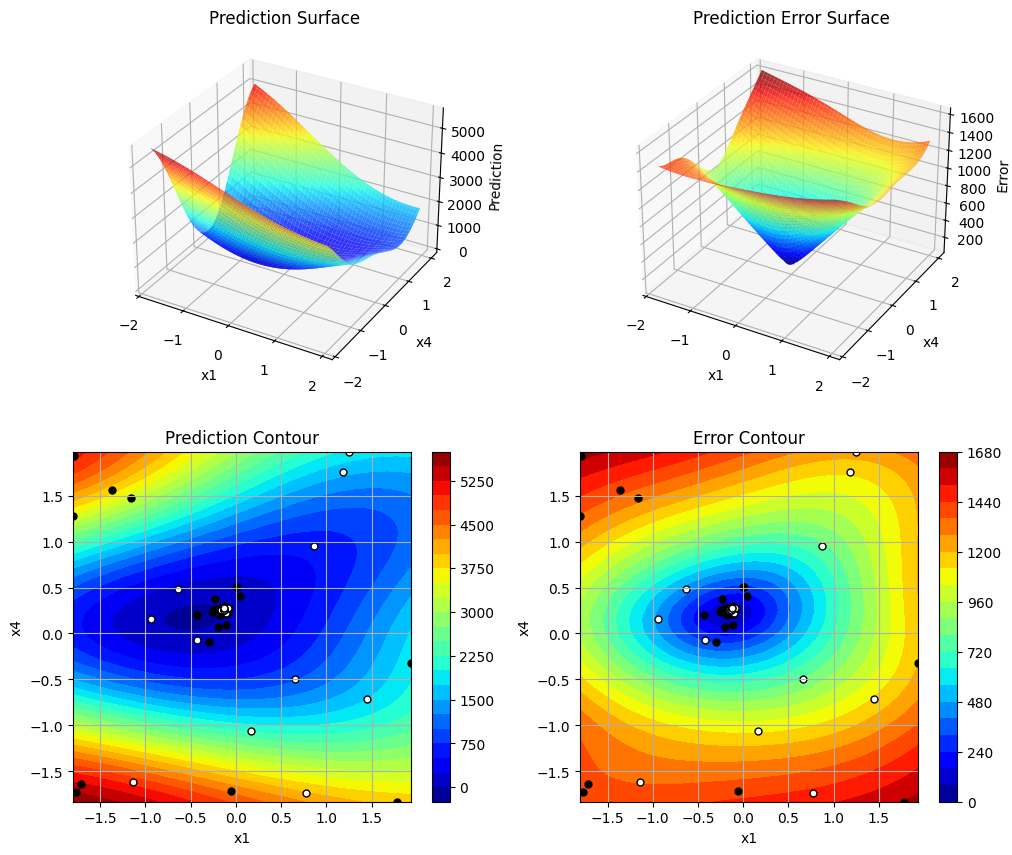

In [9]:
spot_exact_mm.plot_important_hyperparameter_contour(max_imp=3)